In [ ]:
import pandas as pd
df_final = pd.read_csv('df_final_after_in-depth_1.csv').set_index("Unnamed: 0")

## 1. Markdowns strategy recommendations

In [ ]:
df_final

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Month,Day,Type_A,Type_B,Type_C,Holiday_Christmas,Holiday_Labor Day,Holiday_Not a holiday,Holiday_Superbowl,Holiday_Thanksgiving
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
99,1,1,23350.88,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,...,12,30,1,0,0,1,0,0,0,0
242,1,2,43539.94,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,...,12,30,1,0,0,1,0,0,0,0
385,1,3,8848.44,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,...,12,30,1,0,0,1,0,0,0,0
528,1,4,37371.22,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,...,12,30,1,0,0,1,0,0,0,0
671,1,5,34981.76,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,...,12,30,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421549,45,98,508.37,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,...,9,28,0,1,0,0,0,1,0,0
421550,45,98,628.10,64.89,3.985,5046.74,192.00,18.82,2253.43,2340.01,...,10,5,0,1,0,0,0,1,0,0
421551,45,98,1061.02,54.47,4.000,1956.28,192.00,7.89,599.32,3990.54,...,10,12,0,1,0,0,0,1,0,0


THE PLAN

in brightspace:

Markdown strategy: How do you recommend to apply markdowns? Give your recommendations for 3 departments of 3 stores. OPTIONS

Holiday markdown strategy: How do you recommend to apply markdowns during the holidays? Give your recommendations for 3 departments of 3 stores. HOLIDAY OPTIONS

Which indicators (CPI, Fuel Price, etc.) seem to be relevant for which departments of your three stores? How do you recommend Walmart should deal with changes on these indicators?

# OUTLINE OF OURS

Options: 

every store (3 stores) 3 departments.                                                                                                                                                                                                                                                                                                        3 different dataframes are created and a decision tree or random forest model is created -> so that feature importance can be created to see which markdowns are most important. 

Spot the most important indicators (CPI, Fuel price etc...) in feature importance

Recommendations:

which markdowns should be applied together with what indicators(features). 

Types

every type (A,B,C) all departments                                                                                                                                                                                                                         3 different dataframes are created and a decision tree or random forest momdel is created -> so that feature importance can be created to see which markdowns are most important. 

Recommendations:

which markdowns should be applied together with what indicators(features). 

Holiday Options :   

every store (3 types) all departments. on only holidays!                                                                                                                                                                                3 different dataframes are created and a decision tree or random forest model is created -> so that feature importance can be created to see which markdowns are most important.    

Recommendations:

which markdowns should be applied together with what indicators(features). 

# OPTIONS (3 STORES WITH 3 DEPARTMENTS)

Making the dataframes of each store as an option with 3 same departments that are being analyzed for each store.

In [ ]:
option1 = df_final[(df_final['Dept']== 72) | (df_final['Dept']== 11) | (df_final['Dept']== 4)]
option1= option1[option1['Store']== 26 ] 
option1.shape

(93, 24)

In [ ]:
option2 = df_final[(df_final['Dept']== 72) | (df_final['Dept']== 11) | (df_final['Dept']== 4)]
option2= option2[option2['Store']== 8] 
option2.shape



(99, 24)

In [ ]:
option3 = df_final[(df_final['Dept']== 72) | (df_final['Dept']== 11) | (df_final['Dept']== 4)]
option3= option3[option3['Store']==11 ] 
option3.shape



(60, 24)

# 

## Option1 (Store1)

Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the entire DataFrame and transform the data
option1_standardized = pd.DataFrame(scaler.fit_transform(option1), columns=option1.columns)



Splitiing the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



#split the data into train and test splits
X1 = option1_standardized.drop(["Weekly_Sales"], axis=1)
y1 = option1_standardized["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

   

plotting correlation

In [ ]:
#Correlation of the features with Weekly sales. 
correlations1 = pd.DataFrame(option1.corr()['Weekly_Sales'].sort_values(ascending=False))


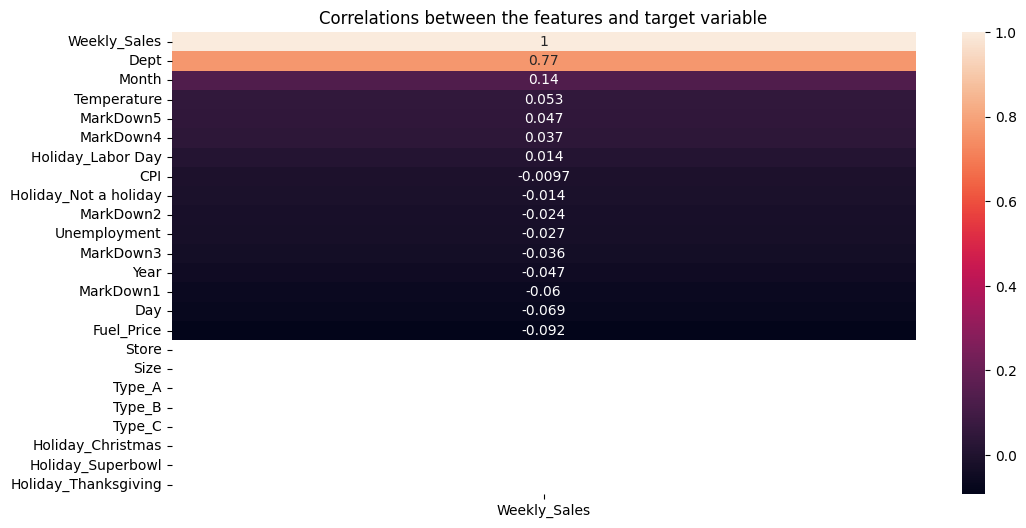

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))  # Set the figure size
sns.heatmap(correlations1, annot=True)
plt.title("Correlations between the features and target variable")
plt.show()

build model random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#fit the model
forest1 = RandomForestRegressor(max_depth = 9, min_samples_split =10, n_estimators = 200)
forest1.fit(X_train, y_train)

#make predictions
y_train_pred = forest1.predict(X_train)
y_test_pred = forest1.predict(X_test)

#Calculate r2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f"Random forest1 r2 train score: {r2_train:.4f}")
print(f"Random forest1 r2 test score: {r2_test:.4f}")

Random forest1 r2 train score: 0.9643
Random forest1 r2 test score: 0.9100


plotting feature importance random forest

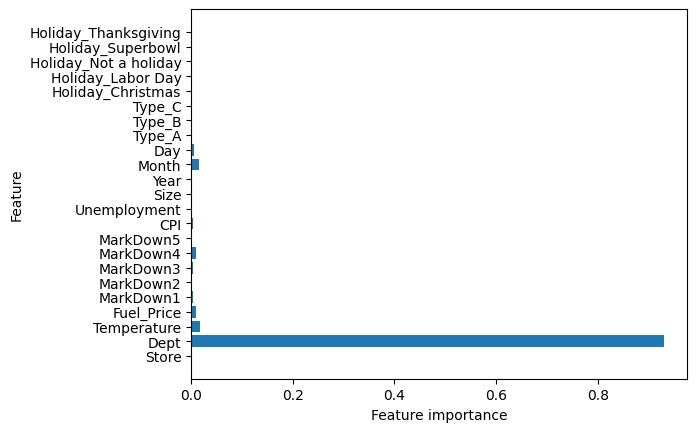

In [ ]:
import numpy as np
def plot_feature_importances(model):
    n_features = X1.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X1.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances(forest1)


In [ ]:
# Evaluate the model forest1
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print()
feature_importances = pd.Series(forest1.feature_importances_, index=X1.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

Mean Squared Error (MSE): 0.10420492684444929
R-squared (R2): 0.910014518127277

Feature Importances:
Dept                     0.929421
Temperature              0.017051
Month                    0.014688
Fuel_Price               0.010460
MarkDown4                0.009929
Day                      0.005408
MarkDown1                0.004382
CPI                      0.002911
MarkDown3                0.002692
MarkDown2                0.001451
MarkDown5                0.001178
Unemployment             0.000248
Year                     0.000182
Holiday_Superbowl        0.000000
Holiday_Not a holiday    0.000000
Store                    0.000000
Holiday_Christmas        0.000000
Holiday_Labor Day        0.000000
Size                     0.000000
Type_C                   0.000000
Type_B                   0.000000
Type_A                   0.000000
Holiday_Thanksgiving     0.000000
dtype: float64


In [ ]:
print("After carrying out feature importance we have reached the conclusion that Markdown 4 is highly")
print("recommended to focus on as it has the most significance out of all markdowns.")

After carrying out feature importance we have reached the conclusion that Markdown 4 is highly
recommended to focus on as it has the most significance out of all markdowns.


# Option2 (Store2)

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the entire DataFrame and transform the data
option2_standardized = pd.DataFrame(scaler.fit_transform(option2), columns=option2.columns)



In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score



#split the data into train and test splits
X2 = option2_standardized.drop(["Weekly_Sales"], axis=1)
y2 = option2_standardized["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

   

In [ ]:
#PCorrelation of the features with Weekly sales. 
correlations2 = pd.DataFrame(option2.corr()['Weekly_Sales'].sort_values(ascending=False))

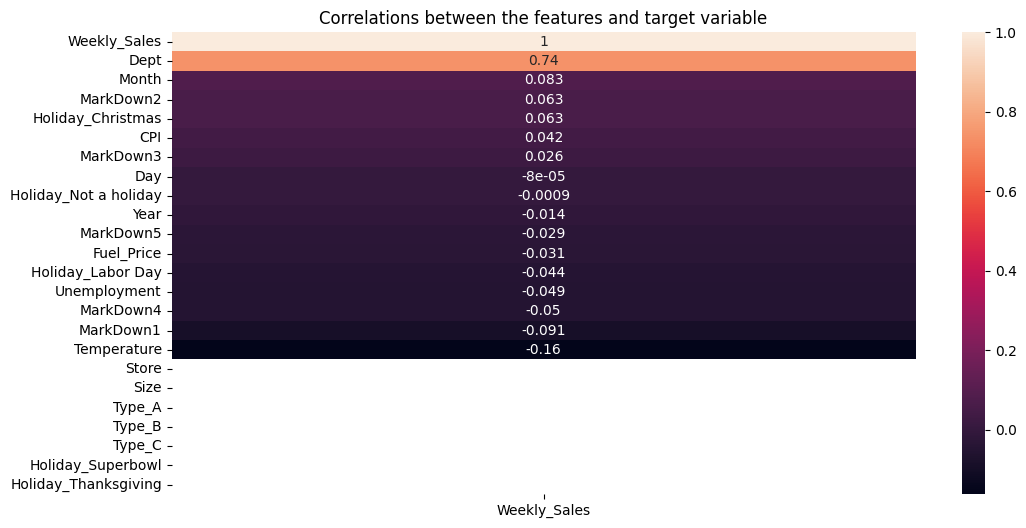

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.heatmap(correlations2, annot=True)
plt.title("Correlations between the features and target variable")
plt.show()

build model random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#fit the model
forest2 = RandomForestRegressor(max_depth = 9, min_samples_split =10, n_estimators = 200)
forest2.fit(X_train, y_train)

#make predictions
y_train_pred = forest2.predict(X_train)
y_test_pred = forest2.predict(X_test)

#Calculate r2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f"Random forest2 r2 train score: {r2_train:.4f}")
print(f"Random forest2 r2 test score: {r2_test:.4f}")

Random forest2 r2 train score: 0.9219
Random forest2 r2 test score: 0.8082


plotting feature importance random forest

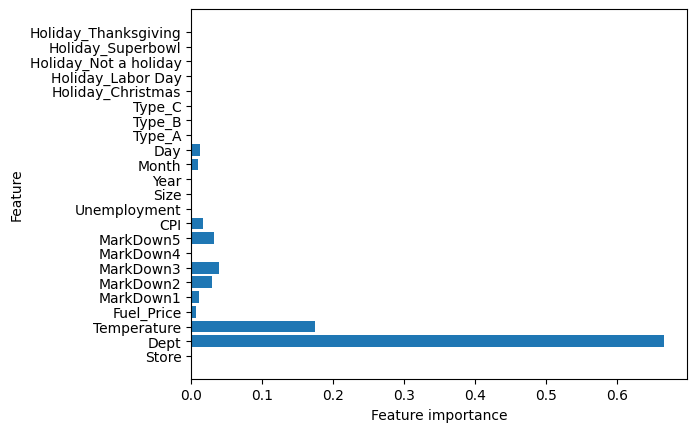

In [ ]:
import numpy as np
def plot_feature_importances(model):
    n_features = X2.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X2.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances(forest2)


In [ ]:
# Evaluate the model forest1
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print()
feature_importances = pd.Series(forest2.feature_importances_, index=X2.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

Mean Squared Error (MSE): 0.21873272794907056
R-squared (R2): 0.8081835470762687

Feature Importances:
Dept                     0.664888
Temperature              0.174148
MarkDown3                0.039192
MarkDown5                0.032197
MarkDown2                0.029838
CPI                      0.016051
Day                      0.012789
MarkDown1                0.011239
Month                    0.009920
Fuel_Price               0.007222
MarkDown4                0.001114
Unemployment             0.001106
Year                     0.000296
Holiday_Superbowl        0.000000
Holiday_Not a holiday    0.000000
Store                    0.000000
Holiday_Christmas        0.000000
Holiday_Labor Day        0.000000
Size                     0.000000
Type_C                   0.000000
Type_B                   0.000000
Type_A                   0.000000
Holiday_Thanksgiving     0.000000
dtype: float64


In [ ]:
print("After carrying out feature importance we have reached the conclusion that Markdown 3 is highly")
print("recommended to focus on as it has the most significance out of all markdowns.")

After carrying out feature importance we have reached the conclusion that Markdown 3 is highly
recommended to focus on as it has the most significance out of all markdowns.


# Option 3 (Store3)



In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the entire DataFrame and transform the data
option3_standardized = pd.DataFrame(scaler.fit_transform(option3), columns=option3.columns)



In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score



#split the data into train and test splits
X3 = option3_standardized.drop(["Weekly_Sales"], axis=1)
y3 = option3_standardized["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

   

In [ ]:
#PCorrelation of the features with Weekly sales. 
correlations3 = pd.DataFrame(option3.corr()['Weekly_Sales'].sort_values(ascending=False))

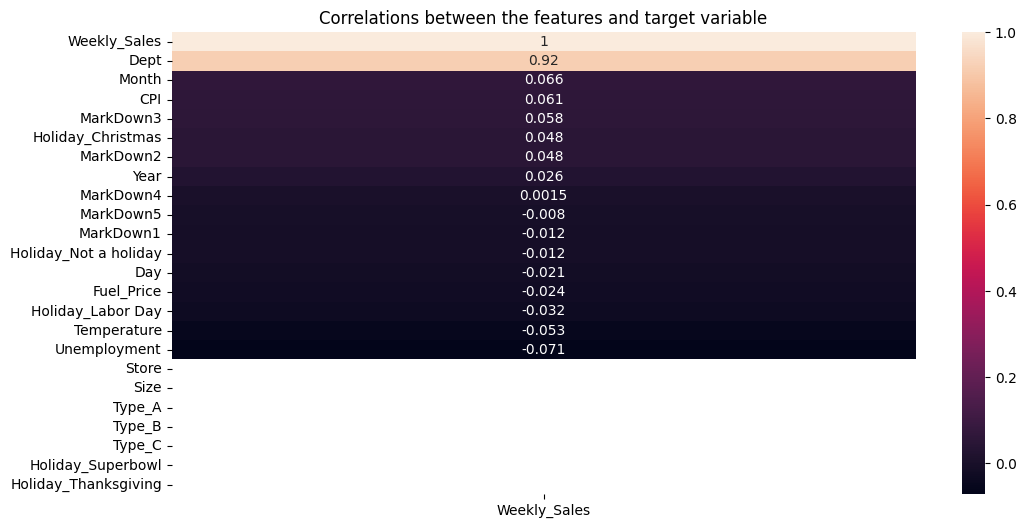

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.heatmap(correlations3, annot=True)
plt.title("Correlations between the features and target variable")
plt.show()

build model random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#fit the model
forest3 = RandomForestRegressor(max_depth = 9, min_samples_split =10, n_estimators = 200)
forest3.fit(X_train, y_train)

#make predictions
y_train_pred = forest3.predict(X_train)
y_test_pred = forest3.predict(X_test)

#Calculate r2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f"Random forest3 r2 train score: {r2_train:.4f}")
print(f"Random forest3 r2 test score: {r2_test:.4f}")

Random forest3 r2 train score: 0.9588
Random forest3 r2 test score: 0.9497


plotting feature importance random forest

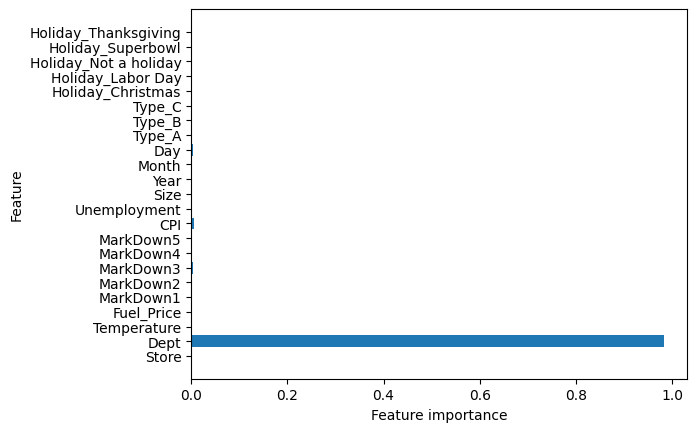

In [ ]:
import numpy as np
def plot_feature_importances(model):
    n_features = X3.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X3.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances(forest3)


In [ ]:
# Evaluate the model forest1
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print()
feature_importances = pd.Series(forest3.feature_importances_, index=X3.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

Mean Squared Error (MSE): 0.047684198573367836
R-squared (R2): 0.9497427268401364

Feature Importances:
Dept                     0.982124
CPI                      0.005124
MarkDown3                0.003589
Day                      0.003310
Month                    0.002252
MarkDown5                0.001164
Temperature              0.000834
MarkDown2                0.000521
Fuel_Price               0.000417
MarkDown4                0.000283
MarkDown1                0.000251
Unemployment             0.000116
Holiday_Not a holiday    0.000015
Store                    0.000000
Holiday_Superbowl        0.000000
Holiday_Christmas        0.000000
Holiday_Labor Day        0.000000
Size                     0.000000
Type_C                   0.000000
Type_B                   0.000000
Type_A                   0.000000
Year                     0.000000
Holiday_Thanksgiving     0.000000
dtype: float64


In [ ]:
print("After carrying out feature importance we have reached the conclusion that Markdown 3 is highly")
print("recommended to focus on as it has the most significance out of all markdowns.")

After carrying out feature importance we have reached the conclusion that Markdown 3 is highly
recommended to focus on as it has the most significance out of all markdowns.


# 3. StoreType with all departments 

creating 3 different dataframes for every type of store (A,B, C)

In [ ]:
df_typeA_dept = pd.get_dummies(df_final, columns=["Dept"], prefix=["Dept"], drop_first=False)
df_typeA_dept = df_typeA_dept[df_typeA_dept['Type_A']==1]
df_typeA_dept

,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
99,1,23350.88,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,...,0,0,0,0,0,0,0,0,0,0
242,1,43539.94,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,...,0,0,0,0,0,0,0,0,0,0
385,1,8848.44,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,...,0,0,0,0,0,0,0,0,0,0
528,1,37371.22,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,...,0,0,0,0,0,0,0,0,0,0
671,1,34981.76,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391008,41,20.00,70.37,3.511,5347.45,192.00,24.60,1481.31,3359.45,194.509211,...,0,0,0,0,0,0,0,0,0,1
391009,41,100.00,58.31,3.566,5347.45,192.00,24.60,1481.31,3359.45,194.638785,...,0,0,0,0,0,0,0,0,0,1
391030,41,30.05,67.24,3.613,6062.57,85.84,1.60,1805.08,2636.17,197.878862,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_typeB_dept = pd.get_dummies(df_final, columns=["Dept"], prefix=["Dept"], drop_first=False)
df_typeB_dept = df_typeB_dept[df_typeB_dept['Type_B']==1]
df_typeB_dept['Type_B']

Unnamed: 0
20577     1
20720     1
20863     1
21006     1
21149     1
         ..
421549    1
421550    1
421551    1
421552    1
421553    1
Name: Type_B, Length: 34393, dtype: int64

In [ ]:
df_typeC_dept = pd.get_dummies(df_final, columns=["Dept"], prefix=["Dept"], drop_first=False)
df_typeC_dept = df_typeC_dept[df_typeC_dept['Type_C']==1]
df_typeC_dept['Type_C']

Unnamed: 0
286631    1
286774    1
286917    1
287060    1
287203    1
         ..
411910    1
411911    1
411912    1
411913    1
411914    1
Name: Type_C, Length: 14440, dtype: int64

# Type A Dept



In [ ]:

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the entire DataFrame and transform the data
df_typeA_dept_standardized = pd.DataFrame(scaler.fit_transform(df_typeA_dept), columns=df_typeA_dept.columns)



In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score



#split the data into train and test splits
X1a = df_typeA_dept_standardized.drop(["Weekly_Sales"], axis=1)
y1a = df_typeA_dept_standardized["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X1a, y1a, test_size=0.2, random_state=42)



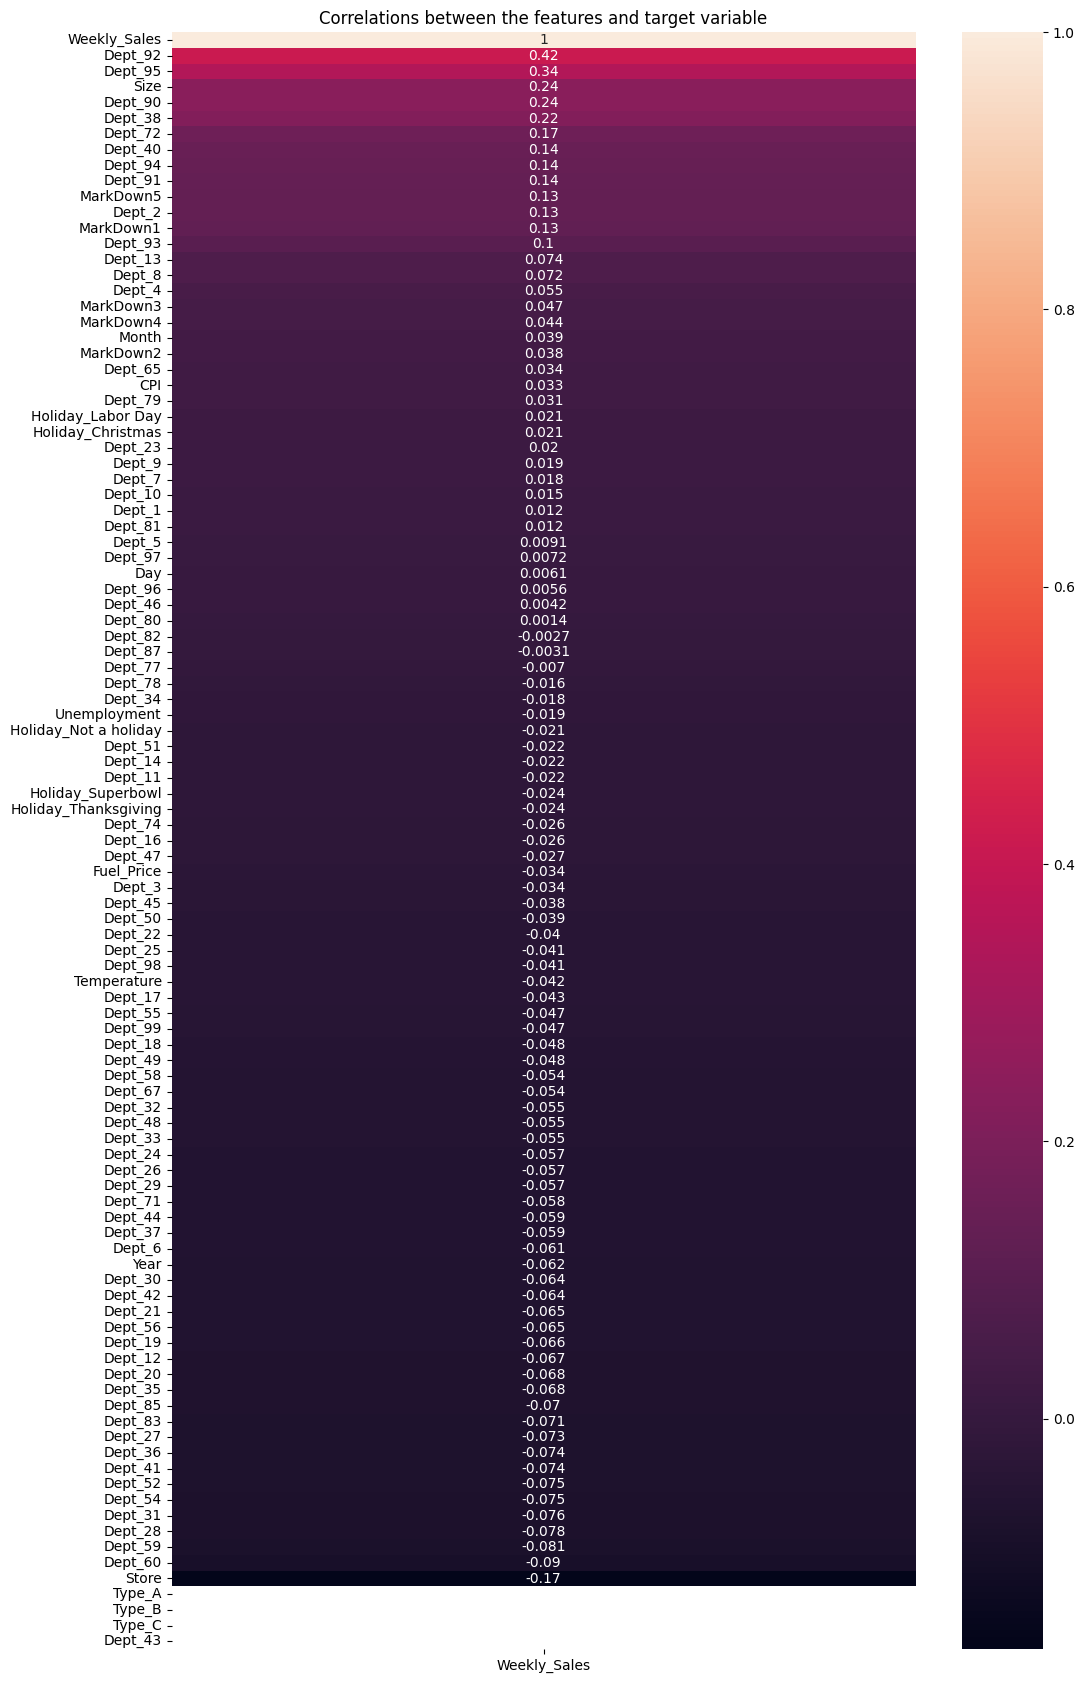

In [ ]:
#PCorrelation of the features with Weekly sales. 
correlations1a = pd.DataFrame(df_typeA_dept.corr()['Weekly_Sales'].sort_values(ascending=False))

plt.figure(figsize=(12, 21))  # Set the figure size
sns.heatmap(correlations1a, annot=True)
plt.title("Correlations between the features and target variable")
plt.show()


forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#fit the model
forest1a = RandomForestRegressor(max_depth = 9, min_samples_split =10, n_estimators = 200)
forest1a.fit(X_train, y_train)

#make predictions
y_train_pred = forest1a.predict(X_train)
y_test_pred = forest1a.predict(X_test)

#Calculate r2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f"Random forest r2 train score: {r2_train:.4f}")
print(f"Random forest r2 test score: {r2_test:.4f}")

Random forest r2 train score: 0.7408
Random forest r2 test score: 0.7294


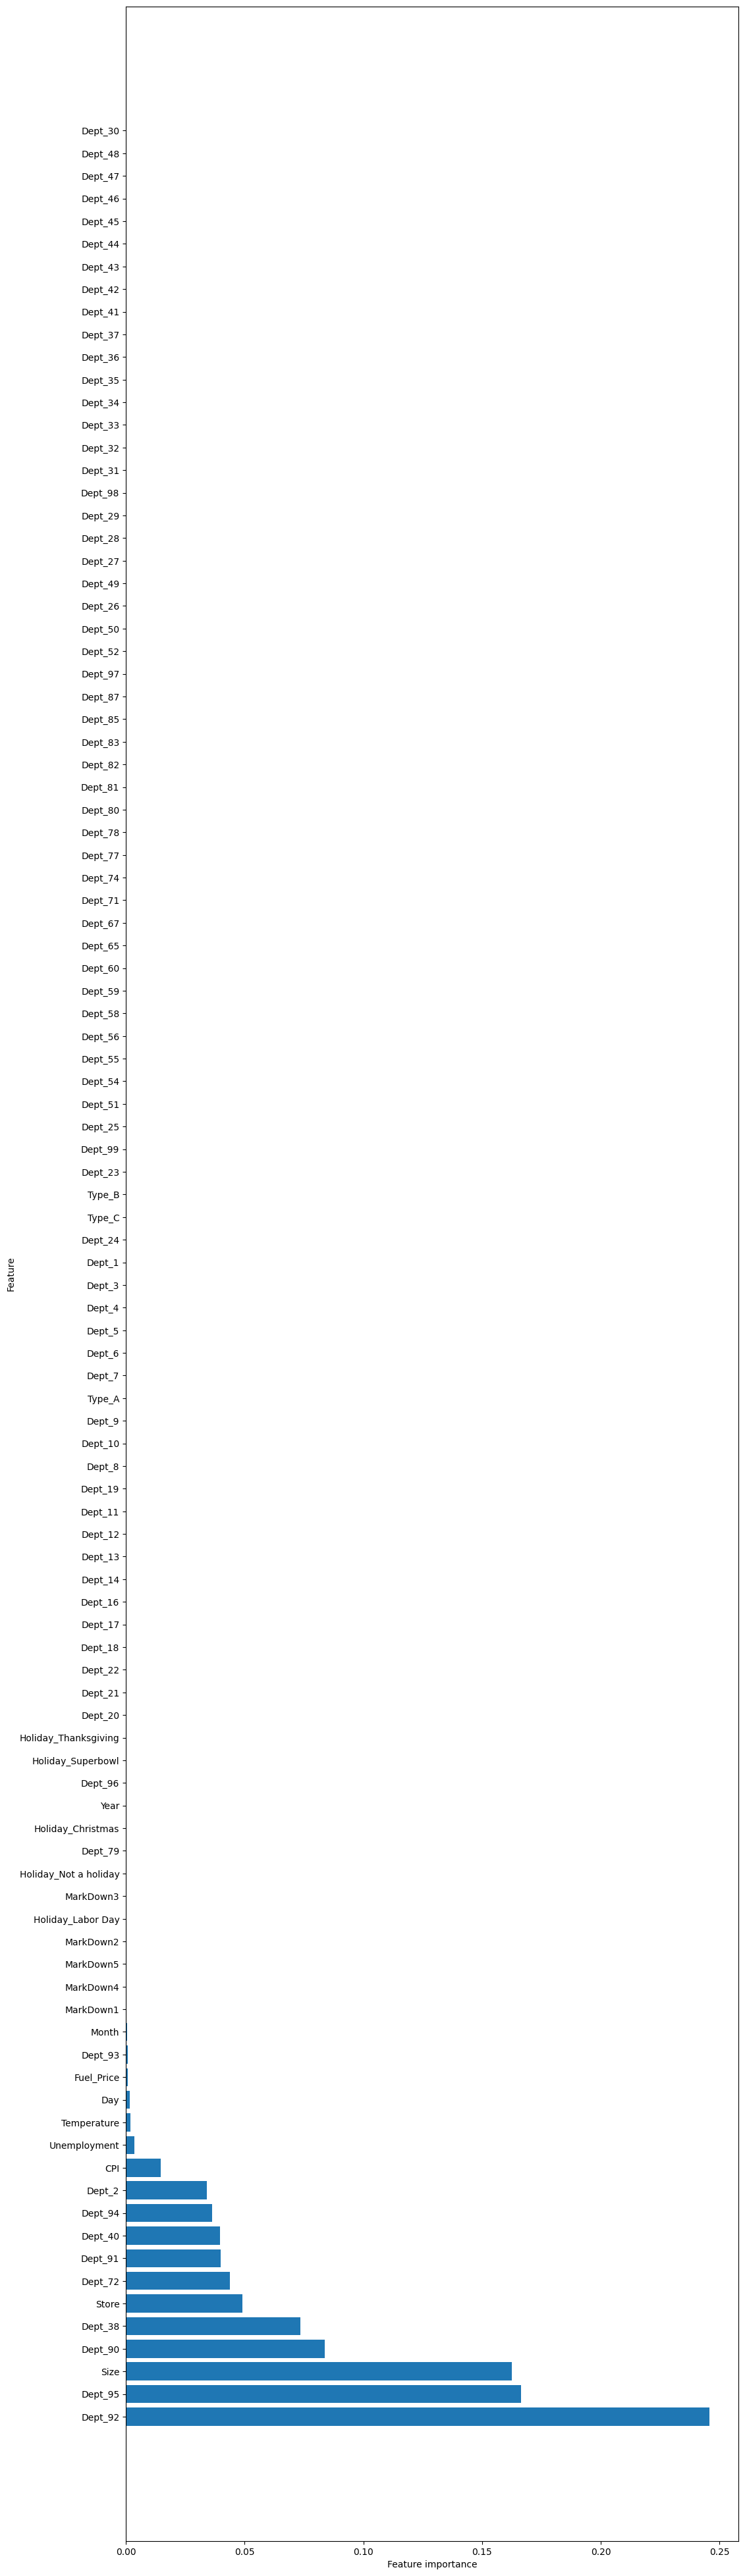

In [ ]:
# feature impor forest
def plot_feature_importances(model):
    n_features = X1a.shape[1]
    
    # Get feature importances in descending order
    feature_importance = model.feature_importances_
    sorted_indices = np.argsort(feature_importance)[::-1]
    sorted_feature_importance = feature_importance[sorted_indices]
    sorted_feature_names = X1a.columns[sorted_indices]

    plt.figure(figsize=(12, 50))
    plt.barh(np.arange(n_features), sorted_feature_importance, align='center')
    plt.yticks(np.arange(n_features), sorted_feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
   
plot_feature_importances(forest1a)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print()
feature_importances = pd.Series(forest1a.feature_importances_, index=X1a.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

Mean Squared Error (MSE): 0.2727721135382186
R-squared (R2): 0.7293540557405556

Feature Importances:
Dept_92    0.245676
Dept_95    0.166490
Size       0.162433
Dept_90    0.083730
Dept_38    0.073439
             ...   
Dept_24    0.000000
Dept_23    0.000000
Dept_22    0.000000
Dept_21    0.000000
Dept_99    0.000000
Length: 102, dtype: float64


In [ ]:
df1 = pd.read_csv('df_final.csv')
# this datagrame is created to check what the description is for each department since all the columns are  numerated.

In [ ]:
print("After carrying out feature importance we have reached the conclusion that department 92, 95 and 90 are highly")
print("recommended to focus on as it has the most significance out of all departments for type A stores")

After carrying out feature importance we have reached the conclusion that department 92, 95 and 90 are highly
recommended to focus on as it has the most significance out of all departments for type A stores


# Type B Dept

In [ ]:

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the entire DataFrame and transform the data
df_typeB_dept_standardized = pd.DataFrame(scaler.fit_transform(df_typeB_dept), columns=df_typeB_dept.columns)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



#split the data into train and test splits
X1b= df_typeB_dept_standardized.drop(["Weekly_Sales"], axis=1)
y1b = df_typeB_dept_standardized["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X1b, y1b, test_size=0.2, random_state=42)


   

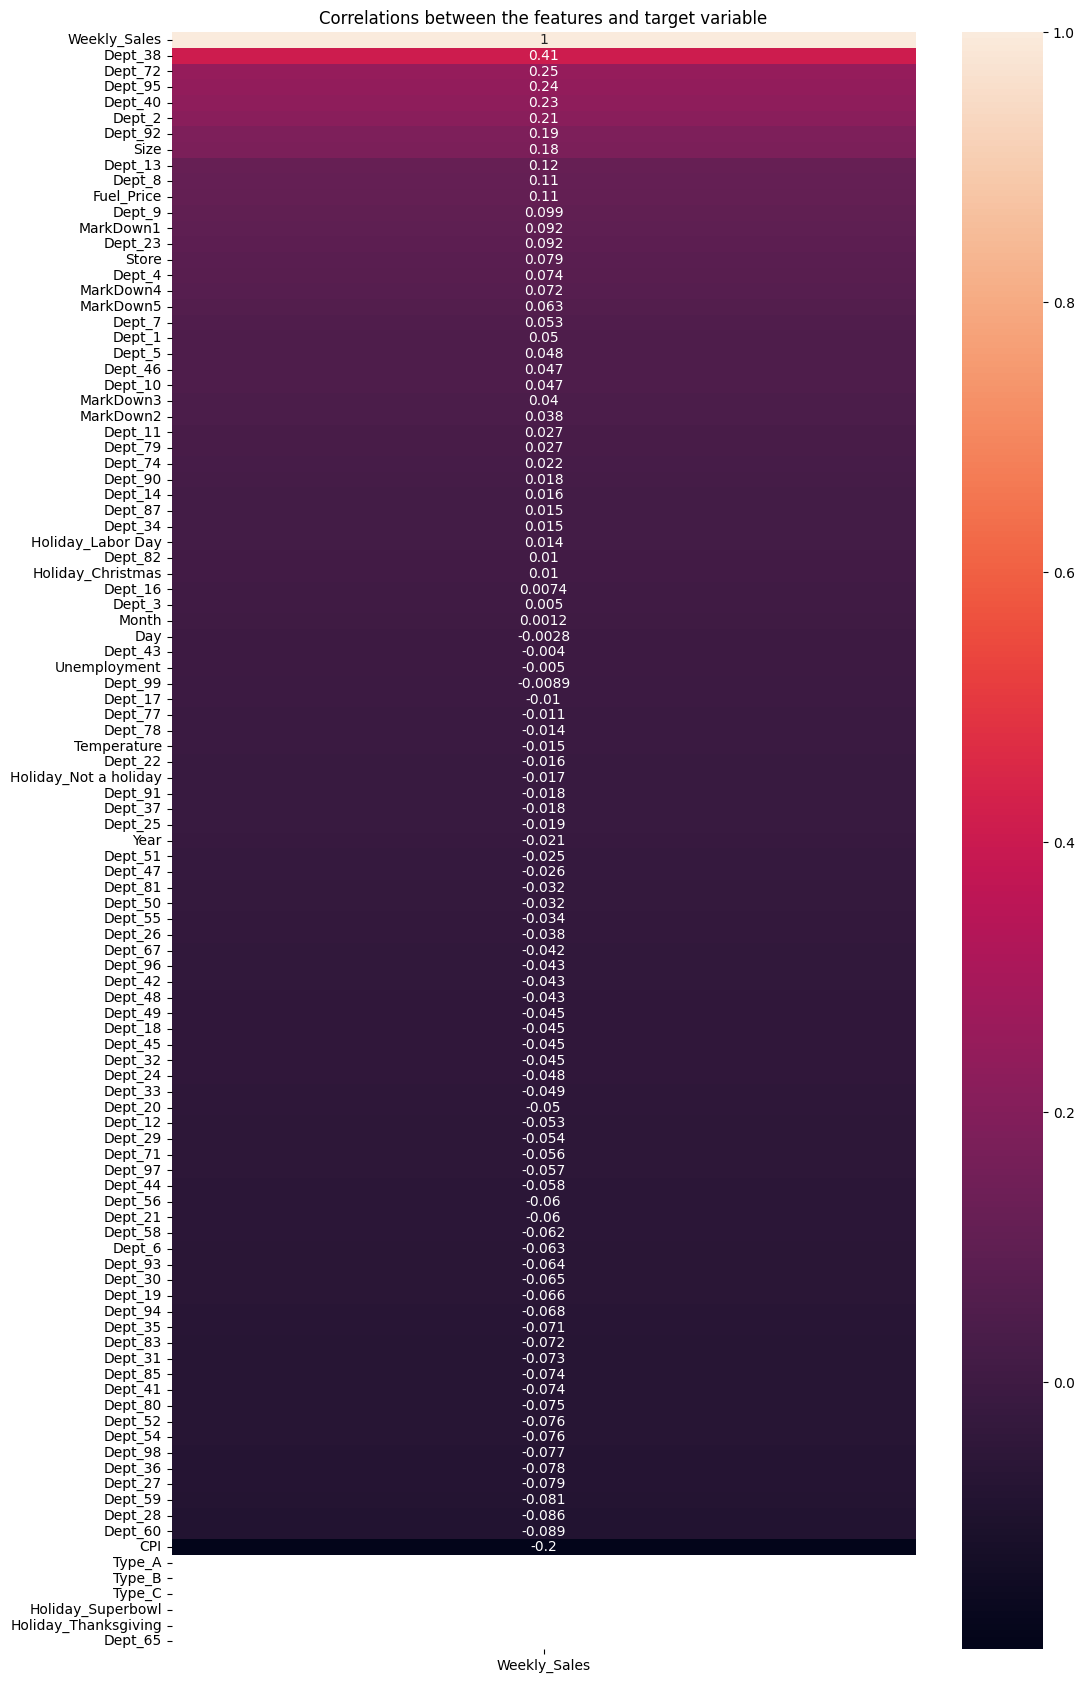

In [ ]:
#PCorrelation of the features with Weekly sales. 
correlations1b = pd.DataFrame(df_typeB_dept.corr()['Weekly_Sales'].sort_values(ascending=False))

plt.figure(figsize=(12, 21))  # Set the figure size
sns.heatmap(correlations1b, annot=True)
plt.title("Correlations between the features and target variable")
plt.show()


forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#fit the model
forest1b = RandomForestRegressor(max_depth = 9, min_samples_split =10, n_estimators = 200)
forest1b.fit(X_train, y_train)

#make predictions
y_train_pred = forest1b.predict(X_train)
y_test_pred = forest1b.predict(X_test)

#Calculate r2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f"Random forest1b r2 train score: {r2_train:.4f}")
print(f"Random forest1b r2 test score: {r2_test:.4f}")

Random forest1b r2 train score: 0.7037
Random forest1b r2 test score: 0.6844


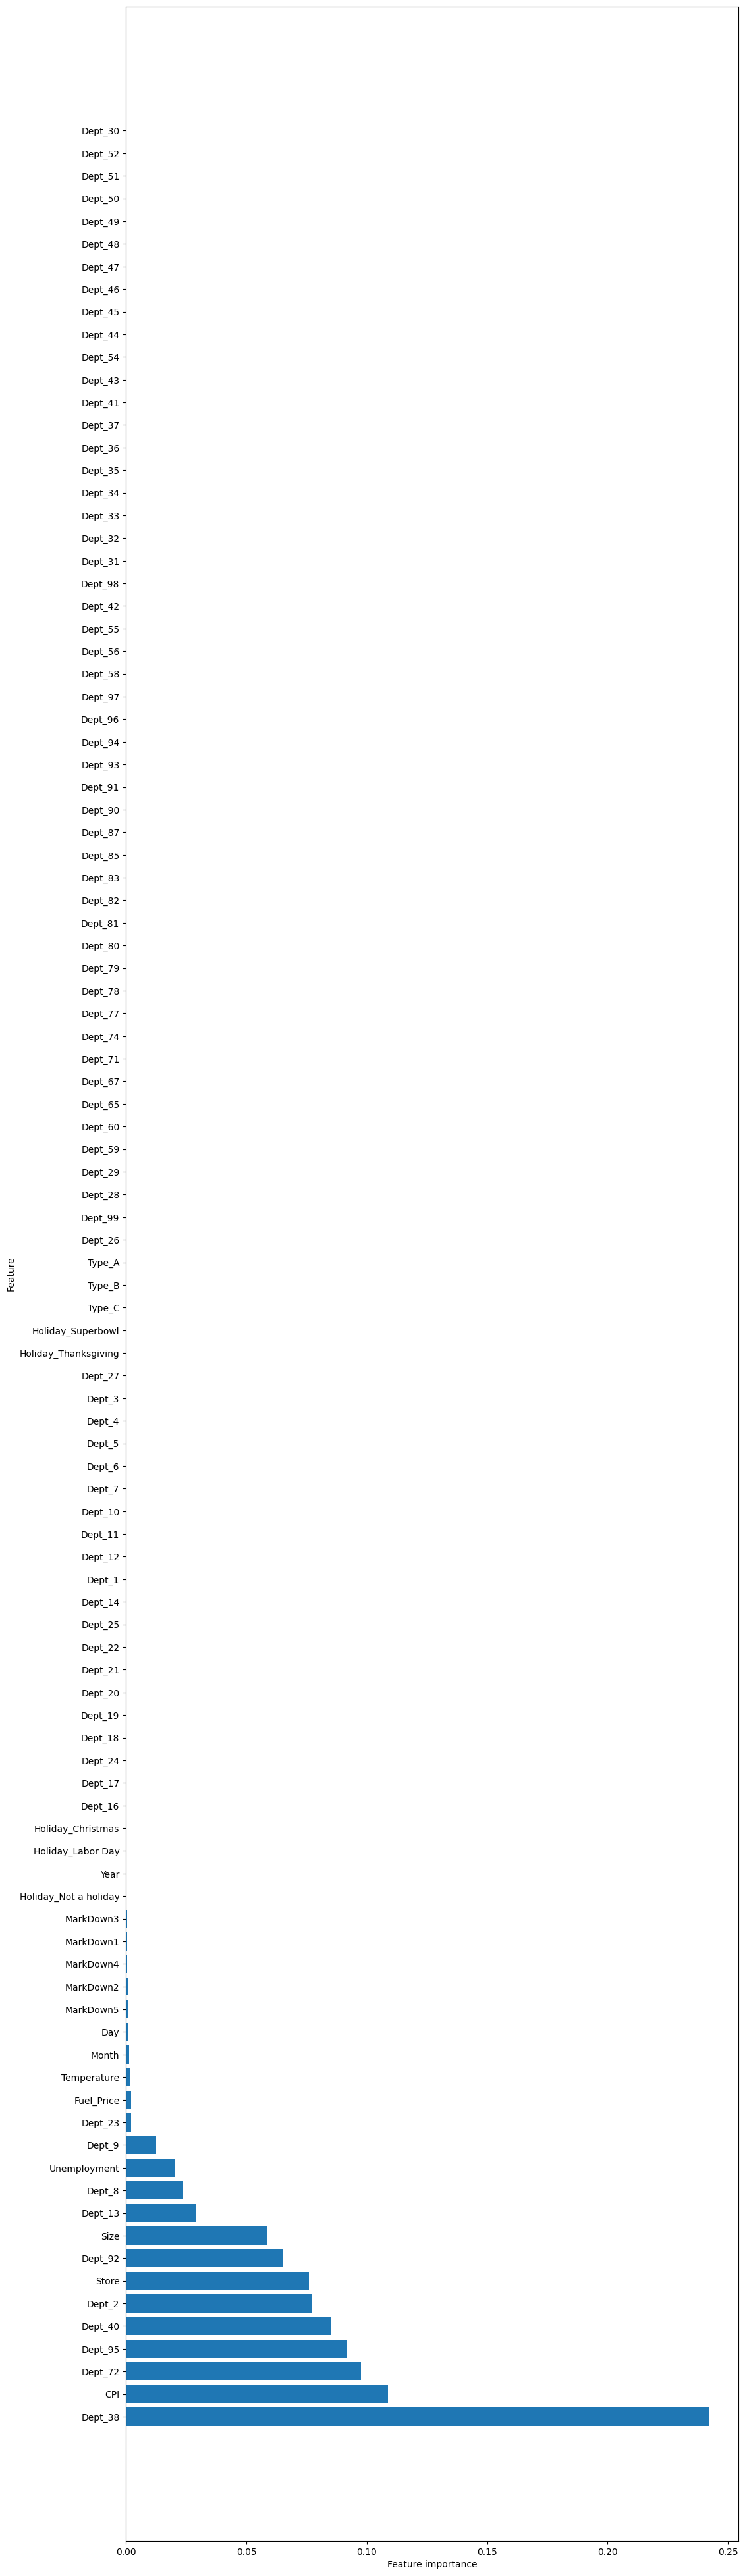

In [ ]:
# feature impor forest
def plot_feature_importances(model):
    n_features = X1b.shape[1]
    
    # Get feature importances in descending order
    feature_importance = model.feature_importances_
    sorted_indices = np.argsort(feature_importance)[::-1]
    sorted_feature_importance = feature_importance[sorted_indices]
    sorted_feature_names = X1b.columns[sorted_indices]

    plt.figure(figsize=(12, 50))
    plt.barh(np.arange(n_features), sorted_feature_importance, align='center')
    plt.yticks(np.arange(n_features), sorted_feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
   
plot_feature_importances(forest1b)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print()
feature_importances = pd.Series(forest1b.feature_importances_, index=X1b.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

Mean Squared Error (MSE): 0.2963233374154736
R-squared (R2): 0.6844324051374513

Feature Importances:
Dept_38    0.242237
CPI        0.108855
Dept_72    0.097641
Dept_95    0.091721
Dept_40    0.085113
             ...   
Dept_25    0.000000
Dept_24    0.000000
Dept_22    0.000000
Dept_21    0.000000
Dept_99    0.000000
Length: 102, dtype: float64


In [ ]:
print("After carrying out feature importance we have reached the conclusion that department 38, 72 and 95 are highly")
print("recommended to focus on as it has the most significance out of all departments for type B stores")

After carrying out feature importance we have reached the conclusion that department 38, 72 and 95 are highly
recommended to focus on as it has the most significance out of all departments for type B stores


# Type C Dept


In [ ]:

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the entire DataFrame and transform the data
df_typeC_dept_standardized = pd.DataFrame(scaler.fit_transform(df_typeC_dept), columns=df_typeC_dept.columns)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score



#split the data into train and test splits
X1c= df_typeC_dept_standardized.drop(["Weekly_Sales"], axis=1)
y1c = df_typeC_dept_standardized["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X1c, y1c, test_size=0.2, random_state=42)


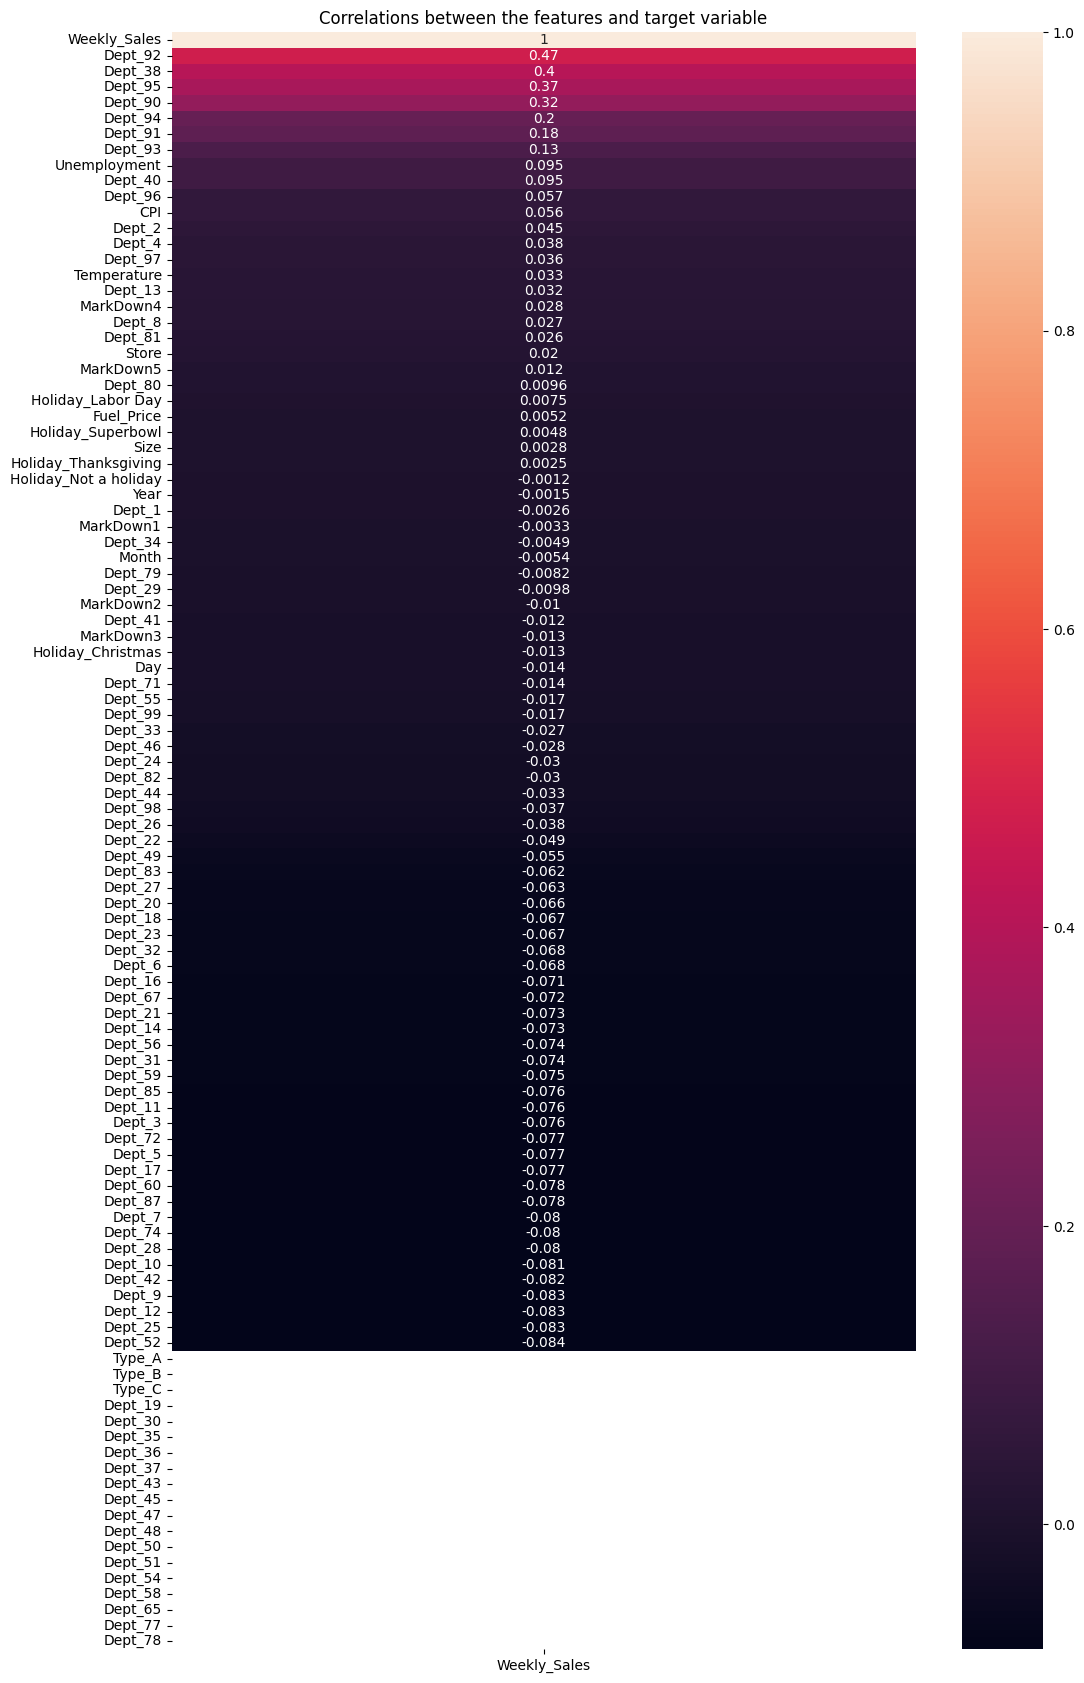

In [ ]:
#PCorrelation of the features with Weekly sales. 
correlations1c = pd.DataFrame(df_typeC_dept.corr()['Weekly_Sales'].sort_values(ascending=False))

plt.figure(figsize=(12, 21))  # Set the figure size
sns.heatmap(correlations1c, annot=True)
plt.title("Correlations between the features and target variable")
plt.show()

forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#fit the model
forest1c = RandomForestRegressor(max_depth = 9, min_samples_split =10, n_estimators = 200)
forest1c.fit(X_train, y_train)

#make predictions
y_train_pred = forest1c.predict(X_train)
y_test_pred = forest1c.predict(X_test)

#Calculate r2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f"Random forest1c r2 train score: {r2_train:.4f}")
print(f"Random forest1c r2 test score: {r2_test:.4f}")

Random forest1c r2 train score: 0.9021
Random forest1c r2 test score: 0.8967


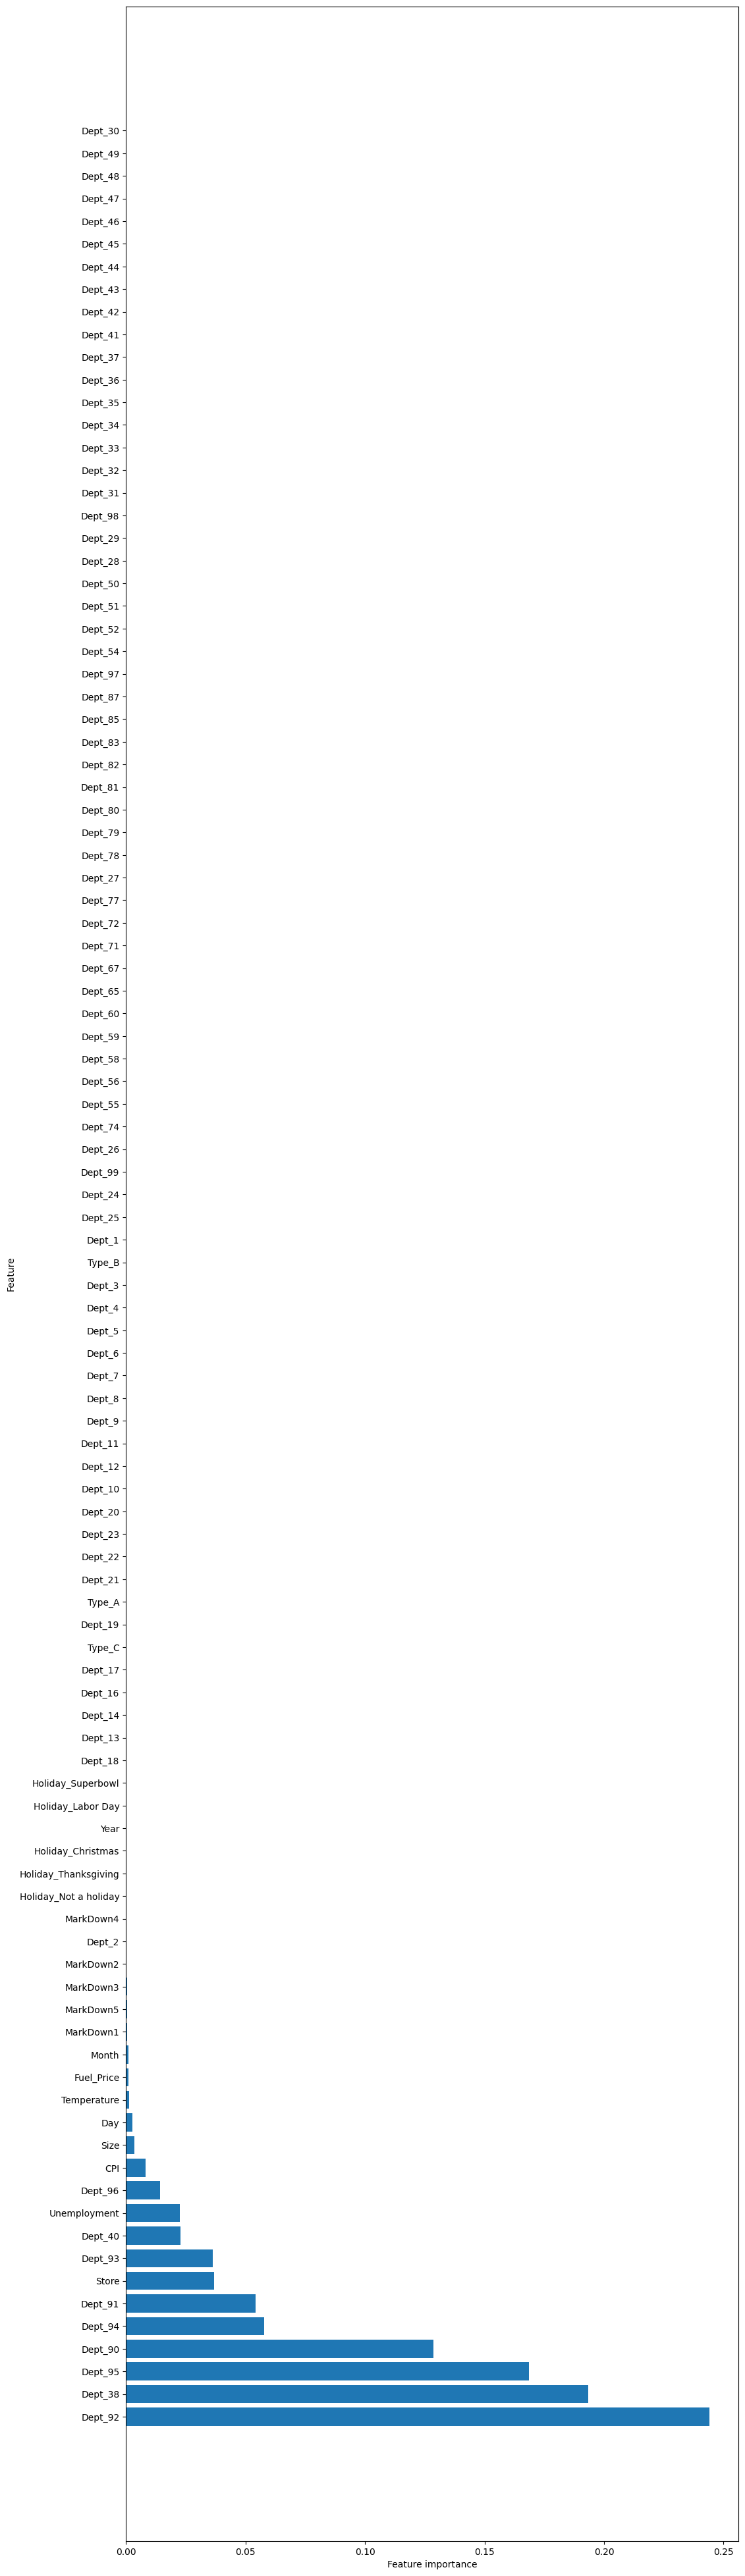

In [ ]:
# feature impor forest
def plot_feature_importances(model):
    n_features = X1c.shape[1]
    
    # Get feature importances in descending order
    feature_importance = model.feature_importances_
    sorted_indices = np.argsort(feature_importance)[::-1]
    sorted_feature_importance = feature_importance[sorted_indices]
    sorted_feature_names = X1c.columns[sorted_indices]

    plt.figure(figsize=(12, 50))
    plt.barh(np.arange(n_features), sorted_feature_importance, align='center')
    plt.yticks(np.arange(n_features), sorted_feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
   
plot_feature_importances(forest1c)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print()
feature_importances = pd.Series(forest1c.feature_importances_, index=X1c.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))


Mean Squared Error (MSE): 0.10837799793118331
R-squared (R2): 0.8966778955942902

Feature Importances:
Dept_92    0.244047
Dept_38    0.193322
Dept_95    0.168552
Dept_90    0.128621
Dept_94    0.057860
             ...   
Dept_24    0.000000
Dept_23    0.000000
Dept_22    0.000000
Dept_21    0.000000
Dept_99    0.000000
Length: 102, dtype: float64


In [ ]:
print("After carrying out feature importance we have reached the conclusion that department 92, 38 and 95 are highly")
print("recommended to focus on as it has the most significance out of all departments.")

After carrying out feature importance we have reached the conclusion that department 92, 38 and 95 are highly
recommended to focus on as it has the most significance out of all departments.


# 2. Holidays Strategy

In [ ]:
df_typeA_holidays =df_typeA_dept.copy()
df_typeA_holidays = df_typeA_holidays[df_typeA_holidays["Holiday_Not a holiday"] == 0]
df_typeA_holidays

,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
99,1,23350.88,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,...,0,0,0,0,0,0,0,0,0,0
242,1,43539.94,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,...,0,0,0,0,0,0,0,0,0,0
385,1,8848.44,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,...,0,0,0,0,0,0,0,0,0,0
528,1,37371.22,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,...,0,0,0,0,0,0,0,0,0,0
671,1,34981.76,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390512,41,97193.69,58.31,3.566,5347.45,192.00,24.60,1481.31,3359.45,194.638785,...,0,0,0,0,0,1,0,0,0,0
390655,41,3468.86,58.31,3.566,5347.45,192.00,24.60,1481.31,3359.45,194.638785,...,0,0,0,0,0,0,1,0,0,0
390798,41,23071.77,58.31,3.566,5347.45,192.00,24.60,1481.31,3359.45,194.638785,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_typeB_holidays = df_typeB_dept.copy()
df_typeB_holidays = df_typeB_holidays[df_typeB_holidays["Holiday_Not a holiday"] == 0]
df_typeB_holidays

,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
20577,3,7793.74,48.29,3.129,1449.16,14356.07,66.66,81.43,777.35,223.009084,...,0,0,0,0,0,0,0,0,0,0
20720,3,16996.31,48.29,3.129,1449.16,14356.07,66.66,81.43,777.35,223.009084,...,0,0,0,0,0,0,0,0,0,0
20863,3,3936.63,48.29,3.129,1449.16,14356.07,66.66,81.43,777.35,223.009084,...,0,0,0,0,0,0,0,0,0,0
21006,3,9354.29,48.29,3.129,1449.16,14356.07,66.66,81.43,777.35,223.009084,...,0,0,0,0,0,0,0,0,0,0
21149,3,17638.62,48.29,3.129,1449.16,14356.07,66.66,81.43,777.35,223.009084,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421266,45,52417.47,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,191.577676,...,0,0,0,0,0,1,0,0,0,0
421359,45,7221.49,71.48,3.738,5347.45,192.00,24.60,1481.31,3359.45,186.673738,...,0,0,0,0,0,0,0,1,0,0
421411,45,7426.19,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,191.577676,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_typeC_holidays = df_typeC_dept.copy()
df_typeC_holidays = df_typeC_holidays[df_typeC_holidays["Holiday_Not a holiday"] == 0]
df_typeC_holidays

,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
286631,30,8952.51,45.16,3.129,782.67,2027.77,24.60,35.28,239.99,219.177306,...,0,0,0,0,0,0,0,0,0,0
286774,30,10363.66,45.16,3.129,782.67,2027.77,24.60,35.28,239.99,219.177306,...,0,0,0,0,0,0,0,0,0,0
286917,30,348.64,45.16,3.129,782.67,2027.77,24.60,35.28,239.99,219.177306,...,0,0,0,0,0,0,0,0,0,0
287060,30,12328.04,45.16,3.129,782.67,2027.77,24.60,35.28,239.99,219.177306,...,0,0,0,0,0,0,0,0,0,0
287203,30,410.56,45.16,3.129,782.67,2027.77,24.60,35.28,239.99,219.177306,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411723,44,5631.87,38.89,3.445,5347.45,192.00,24.60,1481.31,256.45,129.836400,...,0,0,0,0,0,0,0,1,0,0
411734,44,6471.18,33.73,3.116,2463.16,11.50,76.33,1481.31,1635.49,130.384903,...,0,0,0,0,0,0,0,1,0,0
411855,44,3020.02,70.19,3.619,5347.45,192.00,24.60,1481.31,3359.45,129.368613,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#split the data into train and test splits
X_typeA_holidays = df_typeA_holidays.drop(["Weekly_Sales"], axis=1)
y_typeA_holidays = df_typeA_holidays["Weekly_Sales"]

#split the data to train test sets
X_train, X_test, y_train, y_test = train_test_split(X_typeA_holidays, y_typeA_holidays, test_size=0.2, random_state=42)

#fit the model
forest_A_holidays = RandomForestRegressor(max_depth = 9, min_samples_split =10, n_estimators = 200)
forest_A_holidays.fit(X_train, y_train)

#make predictions
y_train_pred = forest_A_holidays.predict(X_train)
y_test_pred = forest_A_holidays.predict(X_test)

#Calculate r2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("holidays type A 3 departments")
print(f"Random forest r2 train score: {r2_train:.4f}")
print(f"Random forest r2 test score: {r2_test:.4f}")

holidays type A 3 departments
Random forest r2 train score: 0.7352
Random forest r2 test score: 0.6445


In [ ]:
#split the data into train and test splits
X_typeB_holidays = df_typeB_holidays.drop(["Weekly_Sales"], axis=1)
y_typeB_holidays = df_typeB_holidays["Weekly_Sales"]

#split the data to train test sets
X_train, X_test, y_train, y_test = train_test_split(X_typeB_holidays, y_typeB_holidays, test_size=0.2, random_state=42)

#fit the model
forest_B_holidays = RandomForestRegressor(max_depth = 9, min_samples_split =10, n_estimators = 200)
forest_B_holidays.fit(X_train, y_train)

#make predictions
y_train_pred = forest_B_holidays.predict(X_train)
y_test_pred = forest_B_holidays.predict(X_test)

#Calculate r2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("holidays type B 3 departments")
print(f"Random forest r2 train score: {r2_train:.4f}")
print(f"Random forest r2 test score: {r2_test:.4f}")

holidays type B 3 departments
Random forest r2 train score: 0.6622
Random forest r2 test score: 0.5435


In [ ]:
#split the data into train and test splits
X_typeC_holidays = df_typeC_holidays.drop(["Weekly_Sales"], axis=1)
y_typeC_holidays = df_typeC_holidays["Weekly_Sales"]

#split the data to train test sets
X_train, X_test, y_train, y_test = train_test_split(X_typeC_holidays, y_typeC_holidays, test_size=0.2, random_state=42)

#fit the model
forest_C_holidays = RandomForestRegressor(max_depth = 9, min_samples_split =10, n_estimators = 200)
forest_C_holidays.fit(X_train, y_train)

#make predictions
y_train_pred = forest_C_holidays.predict(X_train)
y_test_pred = forest_C_holidays.predict(X_test)

#Calculate r2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("holidays type C 3 departments")
print(f"Random forest r2 train score: {r2_train:.4f}")
print(f"Random forest r2 test score: {r2_test:.4f}")

holidays type C 3 departments
Random forest r2 train score: 0.8711
Random forest r2 test score: 0.8449


markdown2 can be best applied
department 92,95,90 are the best selling departments during holidays for store type a


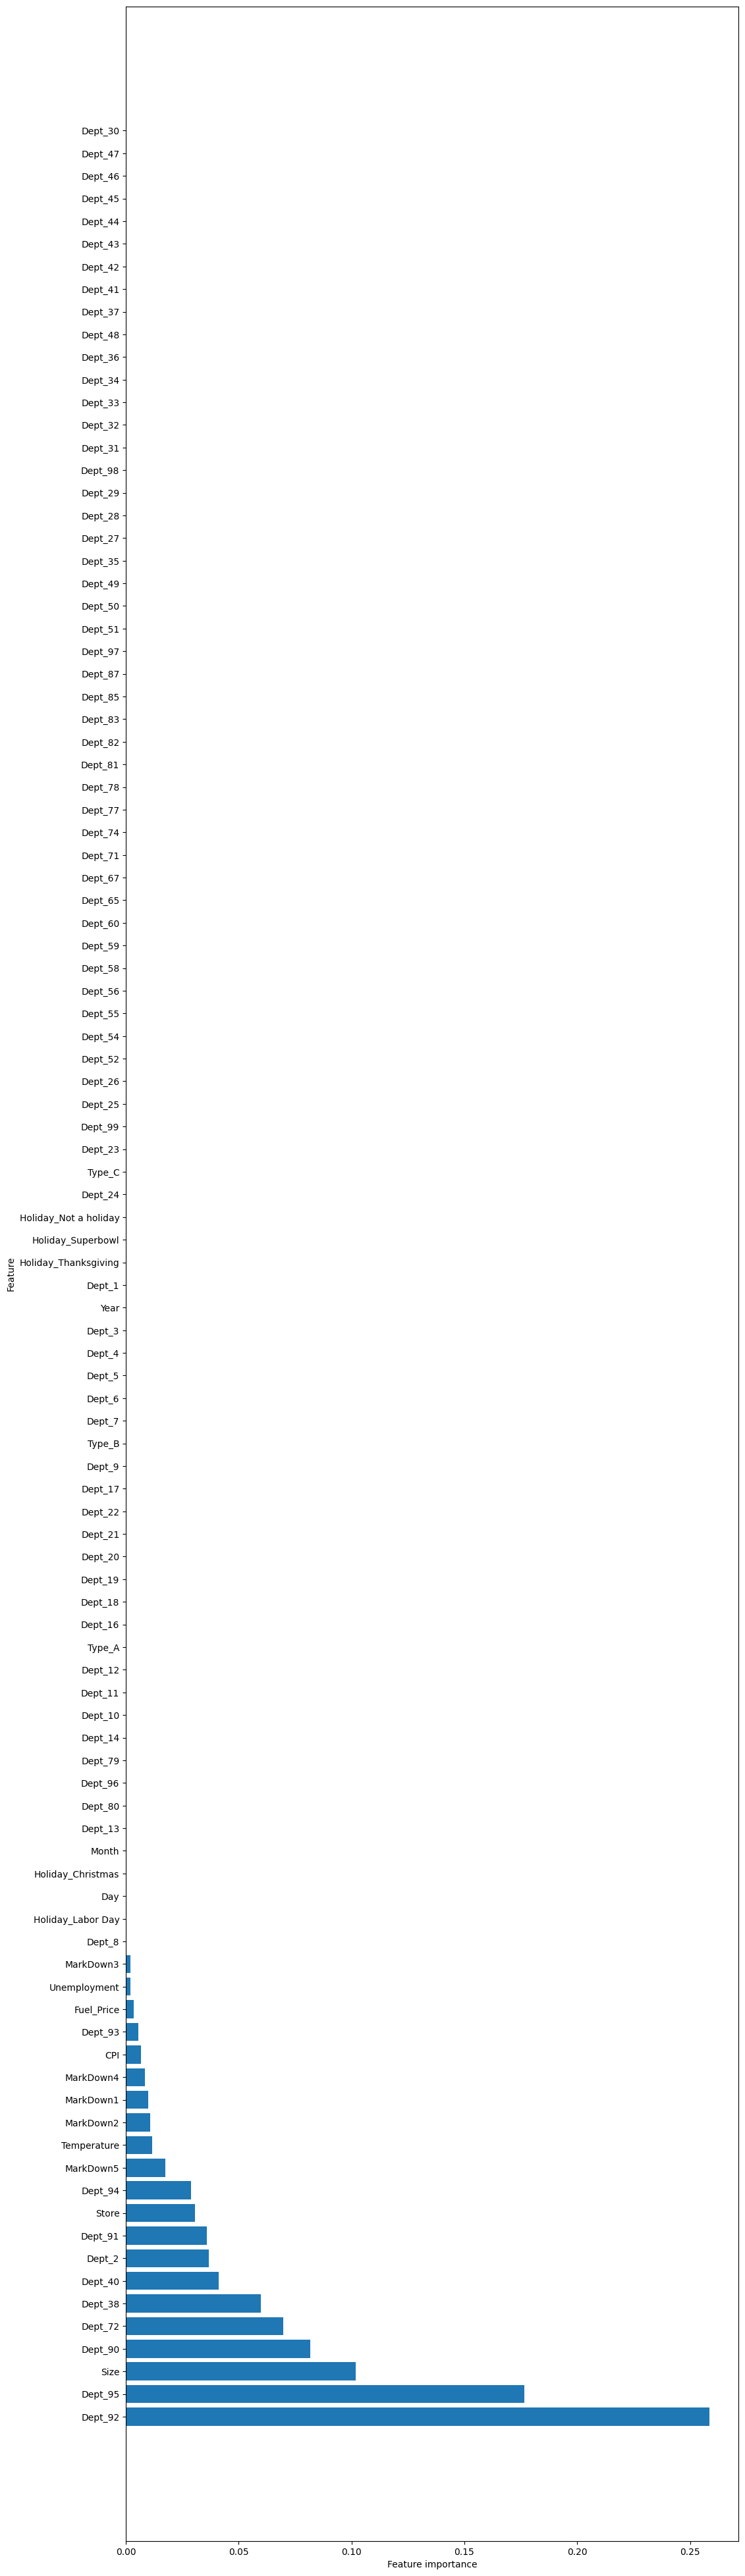

In [ ]:
def plot_feature_importances(model):
    n_features = X_typeA_holidays.shape[1]
    
    # Get feature importances in descending order
    feature_importance = model.feature_importances_
    sorted_indices = np.argsort(feature_importance)[::-1]
    sorted_feature_importance = feature_importance[sorted_indices]
    sorted_feature_names = X_typeA_holidays.columns[sorted_indices]

    plt.figure(figsize=(12, 50))
    plt.barh(np.arange(n_features), sorted_feature_importance, align='center')
    plt.yticks(np.arange(n_features), sorted_feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
   
plot_feature_importances(forest_A_holidays)
print('markdown5 can be best applied')
print('department 92,95,90 are the best selling departments during holidays for store type a')
print('the most important indicators in the holidays for this type of store are temperature, cpi and fuelprice')

markdown2 can be best applied
department 38,72,40 are the best selling departments during holidays for store type b


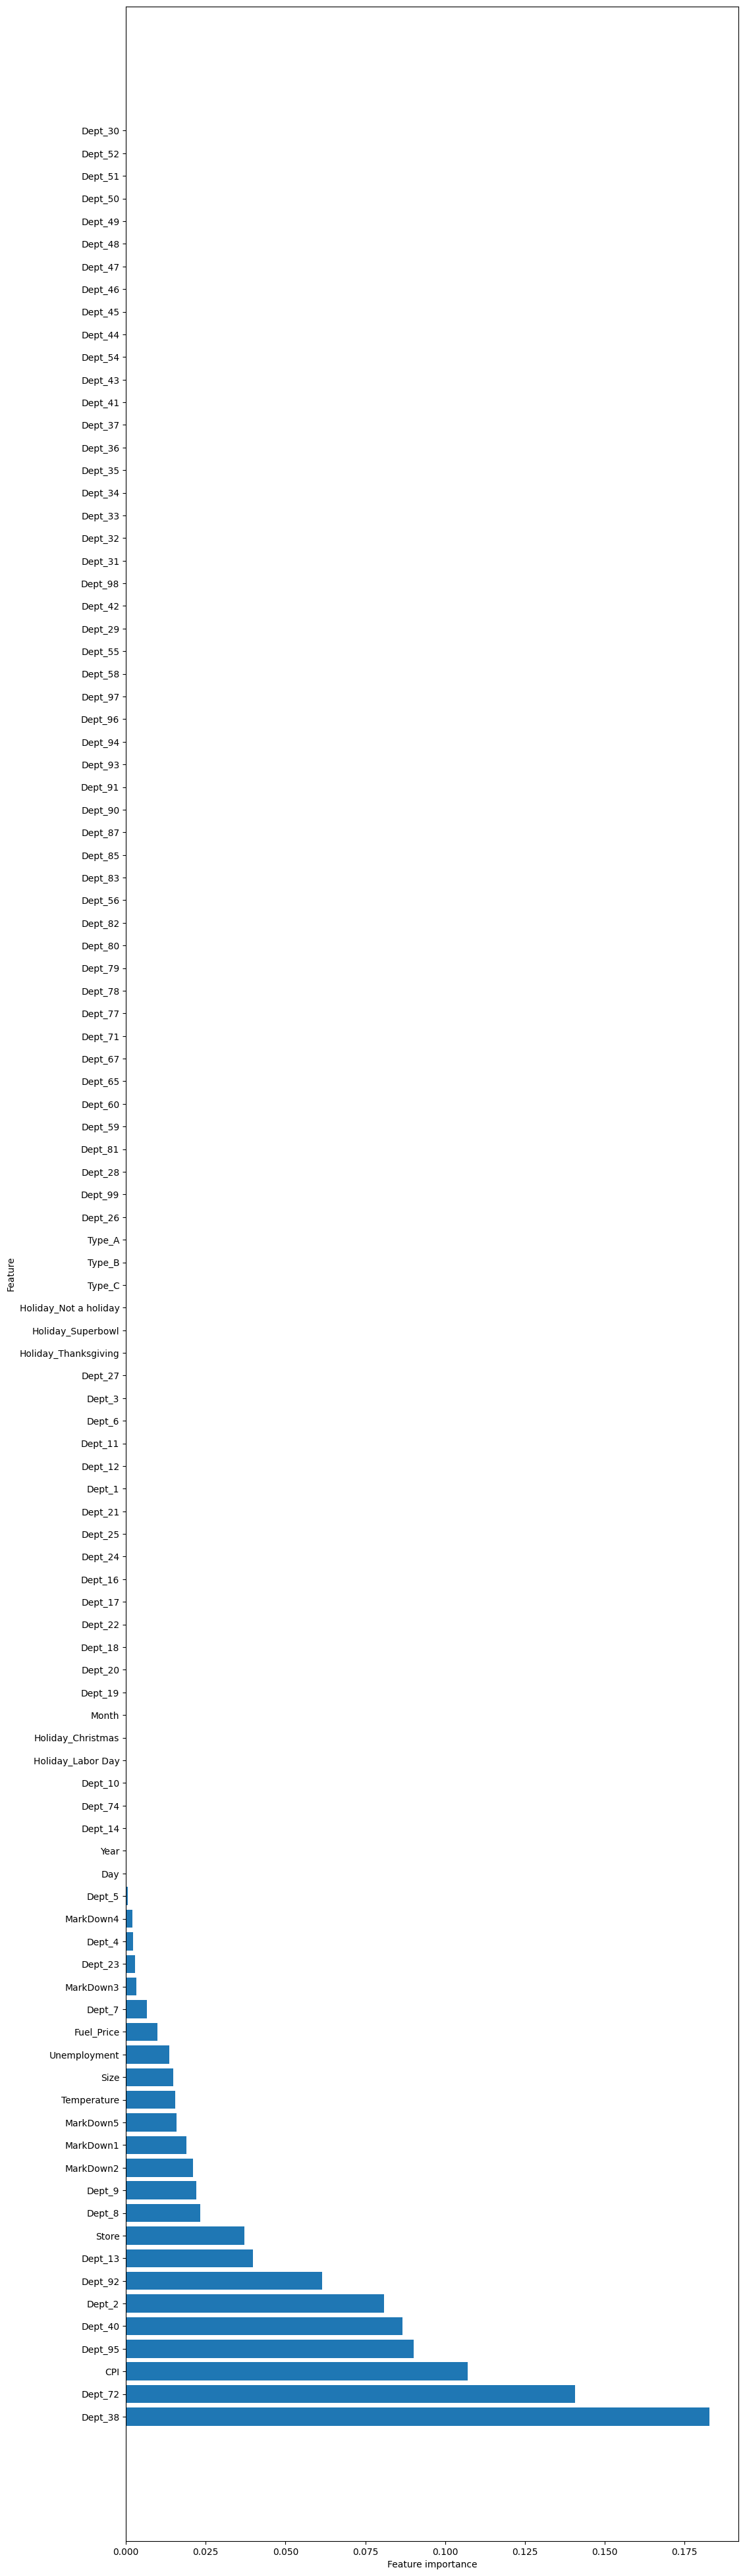

In [ ]:
def plot_feature_importances(model):
    n_features = X_typeB_holidays.shape[1]
    
    # Get feature importances in descending order
    feature_importance = model.feature_importances_
    sorted_indices = np.argsort(feature_importance)[::-1]
    sorted_feature_importance = feature_importance[sorted_indices]
    sorted_feature_names = X_typeB_holidays.columns[sorted_indices]

    plt.figure(figsize=(12, 50))
    plt.barh(np.arange(n_features), sorted_feature_importance, align='center')
    plt.yticks(np.arange(n_features), sorted_feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
   
plot_feature_importances(forest_B_holidays)
print('markdown2 can be best applied')
print('department 38,72,95 are the best selling departments during holidays for store type b')
print('the most important indictors in the holidays are cpi,temperature and unemployment)

markdown1 can be best applied
department 92,95,90 are the best selling departments during holidays for store type c


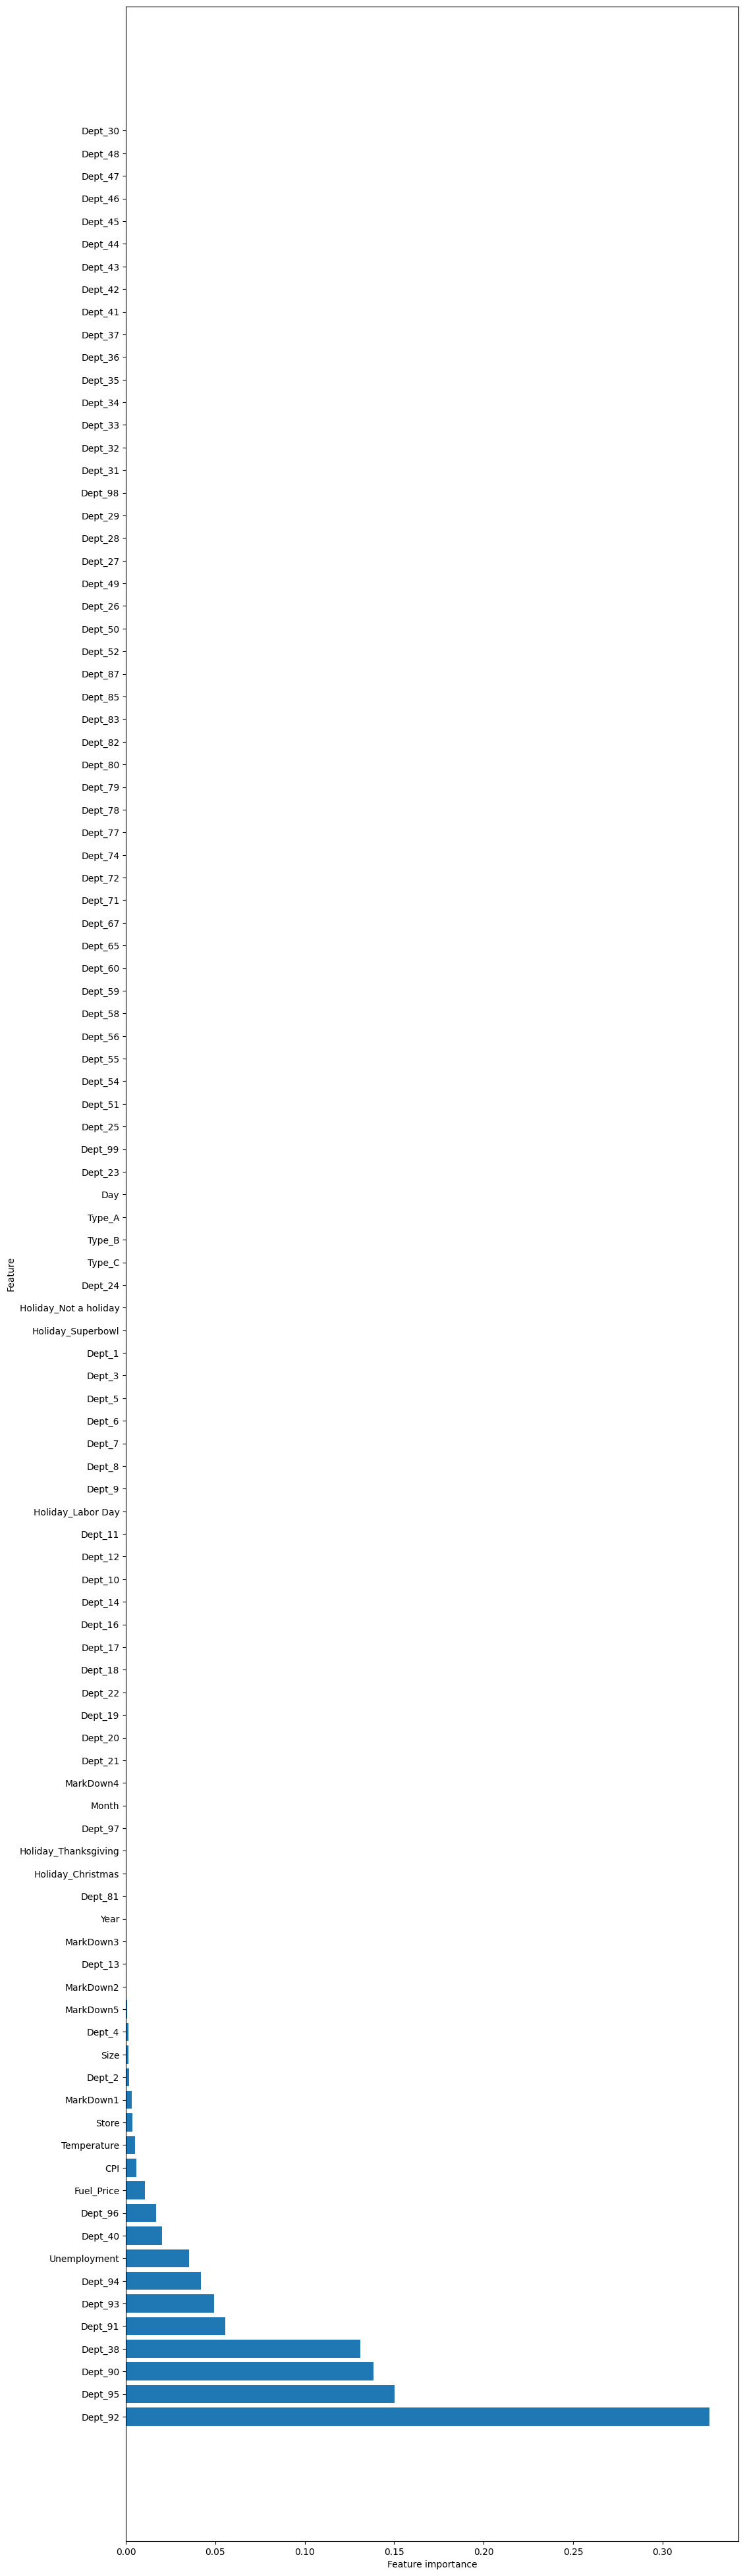

In [ ]:
def plot_feature_importances(model):
    n_features = X_typeC_holidays.shape[1]
    
    # Get feature importances in descending order
    feature_importance = model.feature_importances_
    sorted_indices = np.argsort(feature_importance)[::-1]
    sorted_feature_importance = feature_importance[sorted_indices]
    sorted_feature_names = X_typeC_holidays.columns[sorted_indices]

    plt.figure(figsize=(12, 50))
    plt.barh(np.arange(n_features), sorted_feature_importance, align='center')
    plt.yticks(np.arange(n_features), sorted_feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
   
plot_feature_importances(forest_C_holidays)
print('markdown1 can be best applied')
print('department 92,95,90 are the best selling departments during holidays for store type c')
print('the most important indictors in the holidays are unemployment, fuel_price and cpi')

In [ ]:
# holiday most important departments high selling, high demand. 
#type a
df1[df1['Dept']==92] # Dry Grocery
df1[df1['Dept']==95] #DSD Grocery, Snacks
df1[df1['Dept']==90]#Dairy

#type b
df1[df1['Dept']==38]#Prescription Pharmacy
df1[df1['Dept']==72]#Electronics
df1[df1['Dept']==95]# DSD Grocery, Snacks

#type c
df1[df1['Dept']==92] # Dry Grocery
df1[df1['Dept']==95] #DSD Grocery, Snacks
df1[df1['Dept']==90]#Dairy

#recommend to apply the markdowns on these high demanding departments
print("Since these departments are the highest selling deparments, 
print("it is recommended to focus on applying the markdowns on these departments during the holiday periods.")

SyntaxError: EOL while scanning string literal (4027631096.py, line 18)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=755e957e-1a32-4030-9372-201dbf660aae' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>